# 涨停效应研究

In [1]:
#开始时间
startdate = '20140101'
#结束时间
enddate = '20190227'
#全市场股票获取
stock = list(get_all_securities('stock',enddate).index)
#数据获取
data = get_price(stock,startdate,enddate,'1d',['close','low','open','high'],True,'pre',is_panel=1)
close = data['close']
low = data['low']
opens = data['open']

In [2]:
#最低价非涨停价
limit_down = close-low
limit_down = limit_down[limit_down!=0]

#开盘价为涨停价
limit_open = round(close.shift()*1.1,2)-opens
limit_open = limit_open[limit_open==0]

#开板
df = limit_open+limit_down
df = df.T

non_limit = {}
num = 0
for s in list(df.columns):
    day = s.strftime('%Y-%m-%d')
    dt = df[s]
    dt = list(dt[dt>0].index)
    if len(dt)>0:
        num +=len(dt)
        non_limit[day]=dt
    else:
        pass
non_limit
print('开板数:{}'.format(num))

limitdt = {}
num = 0
tradeday = list(get_trade_days(startdate, '20200202', count=None).strftime('%Y-%m-%d'))
for d in tradeday:
    print(tradeday.index(d),len(tradeday))
    if d in list(non_limit.keys()):
        day = tradeday[tradeday.index(d)+1]
        stockdata = get_price(non_limit[d],None,day,'1m',['open','high','close','low'],True,'pre',bar_count=241,is_panel=1)
        pc = stockdata['close'].iloc[0]
        highlimit = round(pc*1.1,2)
        
        c = stockdata['close'].iloc[-240:]
        h = stockdata['high'].iloc[-240:]
        l = stockdata['low'].iloc[-240:]
        
        for t in list(range(1,240)):
            p1 = h.iloc[t]-highlimit
            p1 = list(p1[p1==0].index)
            p2 = c.iloc[t-1]-highlimit
            p2 = list(p2[p2<0].index)
            
            stock = list((set(p1)&set(p2)))
            if d in list(limitdt.keys()):
                limitdt[d] = list(set(limitdt[d]+stock))
            else:
                limitdt[d] = list(stock)        
limitdt

开板数:1931
0 1466
1 1466
2 1466
3 1466
4 1466
5 1466
6 1466
7 1466
8 1466
9 1466
10 1466
11 1466
12 1466
13 1466
14 1466
15 1466
16 1466
17 1466
18 1466
19 1466
20 1466
21 1466
22 1466
23 1466
24 1466
25 1466
26 1466
27 1466
28 1466
29 1466
30 1466
31 1466
32 1466
33 1466
34 1466
35 1466
36 1466
37 1466
38 1466
39 1466
40 1466
41 1466
42 1466
43 1466
44 1466
45 1466
46 1466
47 1466
48 1466
49 1466
50 1466
51 1466
52 1466
53 1466
54 1466
55 1466
56 1466
57 1466
58 1466
59 1466
60 1466
61 1466
62 1466
63 1466
64 1466
65 1466
66 1466
67 1466
68 1466
69 1466
70 1466
71 1466
72 1466
73 1466
74 1466
75 1466
76 1466
77 1466
78 1466
79 1466
80 1466
81 1466
82 1466
83 1466
84 1466
85 1466
86 1466
87 1466
88 1466
89 1466
90 1466
91 1466
92 1466
93 1466
94 1466
95 1466
96 1466
97 1466
98 1466
99 1466
100 1466
101 1466
102 1466
103 1466
104 1466
105 1466
106 1466
107 1466
108 1466
109 1466
110 1466
111 1466
112 1466
113 1466
114 1466
115 1466
116 1466
117 1466
118 1466
119 1466
120 1466
121 1466
122

922 1466
923 1466
924 1466
925 1466
926 1466
927 1466
928 1466
929 1466
930 1466
931 1466
932 1466
933 1466
934 1466
935 1466
936 1466
937 1466
938 1466
939 1466
940 1466
941 1466
942 1466
943 1466
944 1466
945 1466
946 1466
947 1466
948 1466
949 1466
950 1466
951 1466
952 1466
953 1466
954 1466
955 1466
956 1466
957 1466
958 1466
959 1466
960 1466
961 1466
962 1466
963 1466
964 1466
965 1466
966 1466
967 1466
968 1466
969 1466
970 1466
971 1466
972 1466
973 1466
974 1466
975 1466
976 1466
977 1466
978 1466
979 1466
980 1466
981 1466
982 1466
983 1466
984 1466
985 1466
986 1466
987 1466
988 1466
989 1466
990 1466
991 1466
992 1466
993 1466
994 1466
995 1466
996 1466
997 1466
998 1466
999 1466
1000 1466
1001 1466
1002 1466
1003 1466
1004 1466
1005 1466
1006 1466
1007 1466
1008 1466
1009 1466
1010 1466
1011 1466
1012 1466
1013 1466
1014 1466
1015 1466
1016 1466
1017 1466
1018 1466
1019 1466
1020 1466
1021 1466
1022 1466
1023 1466
1024 1466
1025 1466
1026 1466
1027 1466
1028 1466
1029 146

{'2014-01-03': ['600010.SH'],
 '2014-01-16': ['000767.SZ'],
 '2014-01-27': [],
 '2014-02-12': ['000971.SZ'],
 '2014-02-17': [],
 '2014-02-19': [],
 '2014-02-21': ['603003.SH', '000554.SZ'],
 '2014-02-27': [],
 '2014-02-28': ['600680.SH'],
 '2014-03-05': [],
 '2014-03-10': ['300116.SZ'],
 '2014-03-11': [],
 '2014-03-13': ['000923.SZ'],
 '2014-03-20': [],
 '2014-03-21': [],
 '2014-03-24': [],
 '2014-03-25': [],
 '2014-03-27': ['000687.SZ'],
 '2014-04-01': [],
 '2014-04-03': ['000918.SZ'],
 '2014-04-09': [],
 '2014-04-10': ['300278.SZ'],
 '2014-04-17': [],
 '2014-04-22': [],
 '2014-04-30': ['601001.SH'],
 '2014-05-13': [],
 '2014-05-14': [],
 '2014-05-21': ['002660.SZ'],
 '2014-05-28': [],
 '2014-06-04': ['600601.SH'],
 '2014-06-05': ['600074.SH'],
 '2014-06-06': ['002535.SZ'],
 '2014-06-11': [],
 '2014-06-16': ['300198.SZ'],
 '2014-06-25': [],
 '2014-06-30': ['002093.SZ'],
 '2014-07-02': ['300288.SZ'],
 '2014-07-04': ['002070.SZ'],
 '2014-07-07': ['600568.SH'],
 '2014-07-08': ['600435.SH

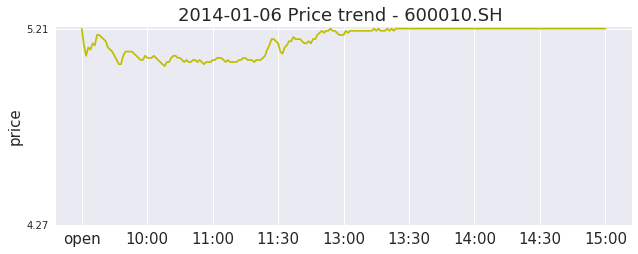

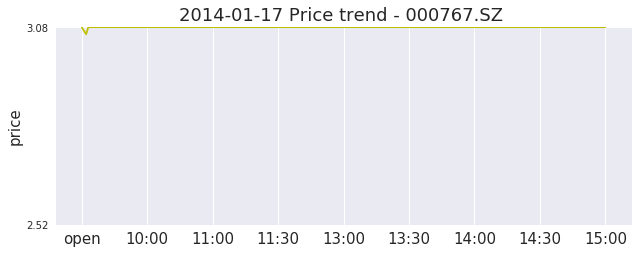

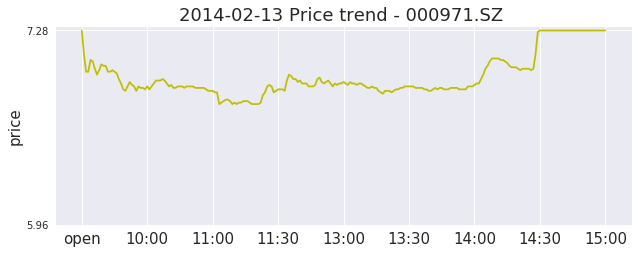

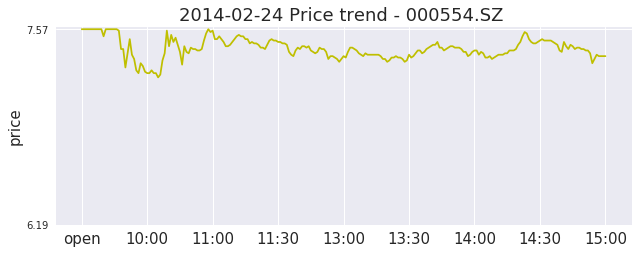

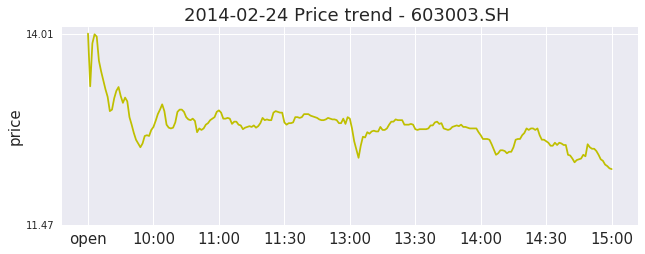

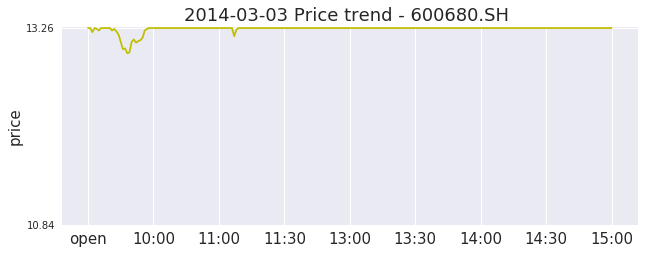

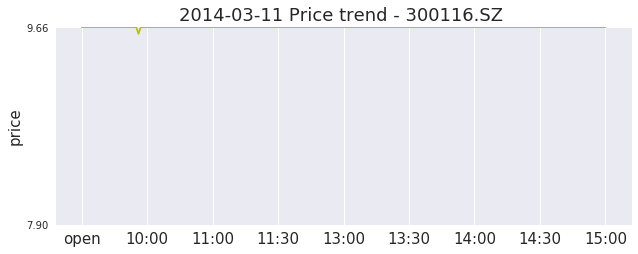

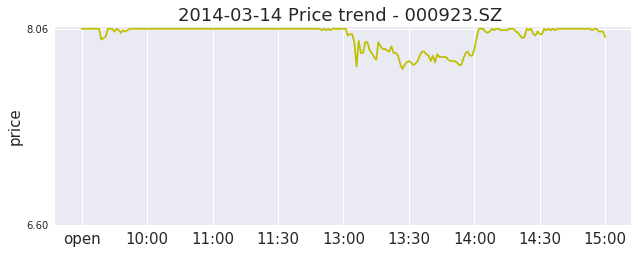

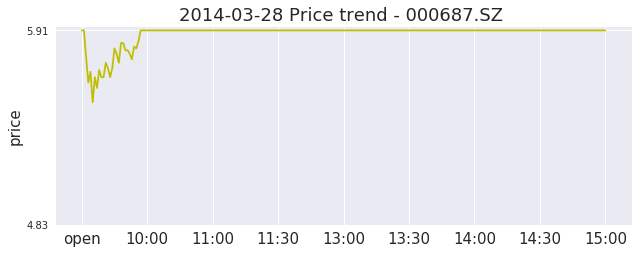

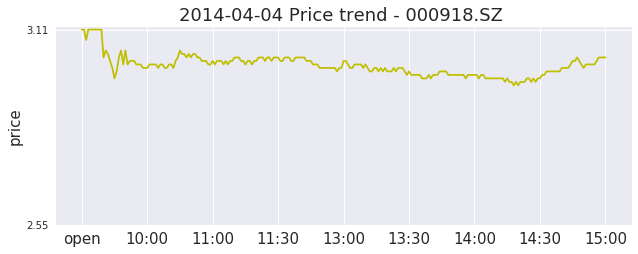

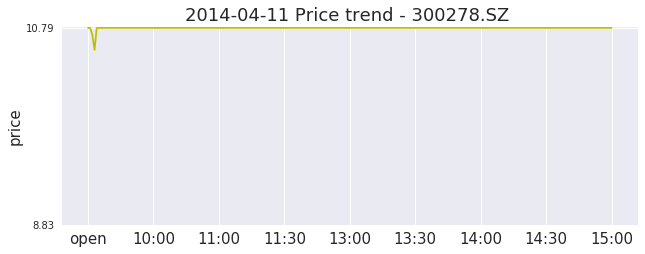

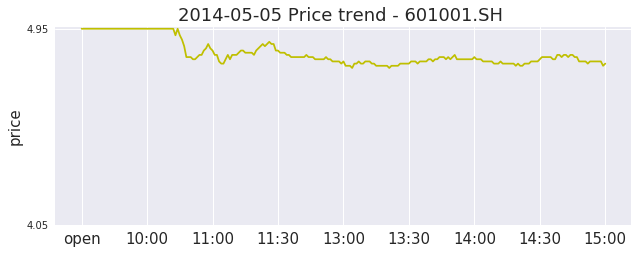

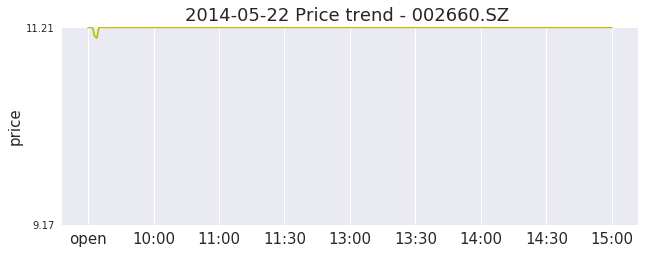

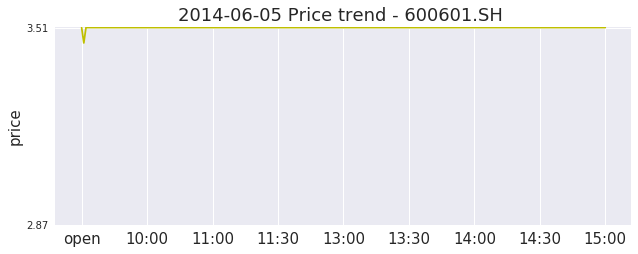

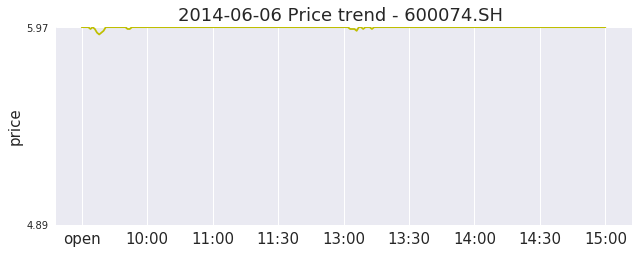

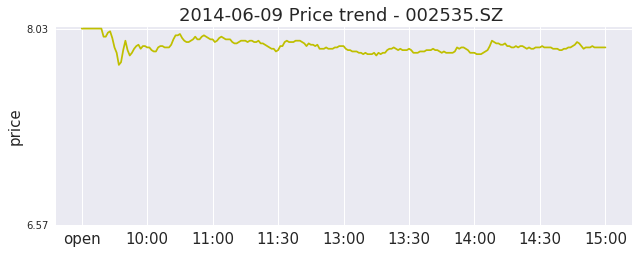

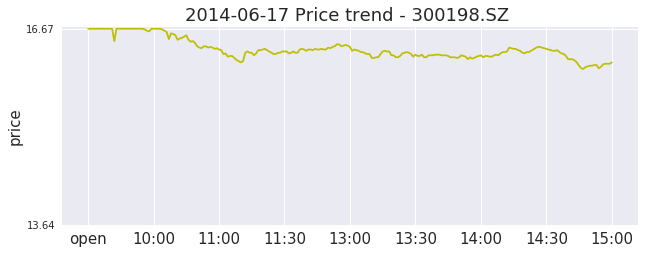

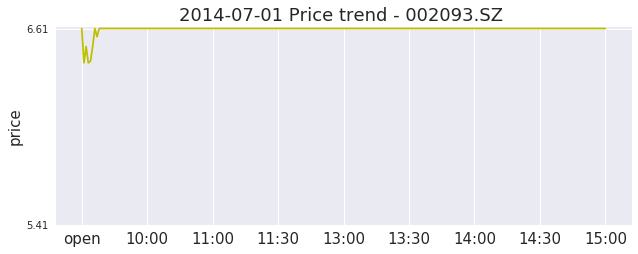

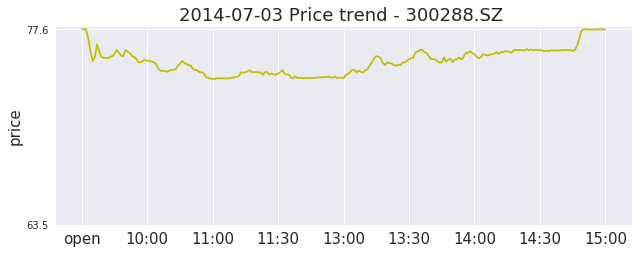

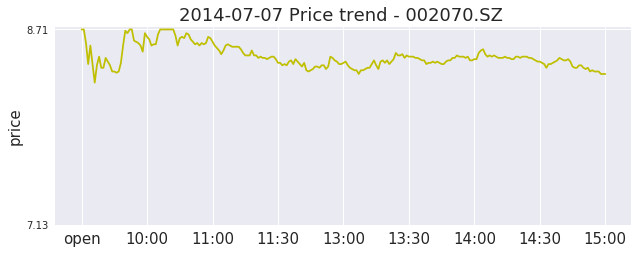

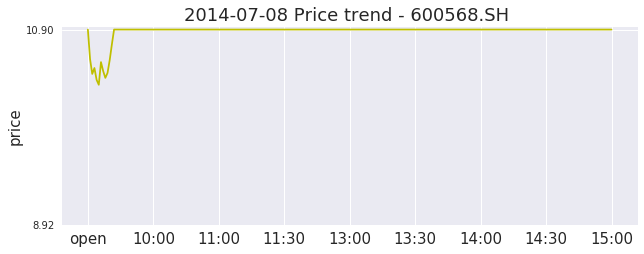

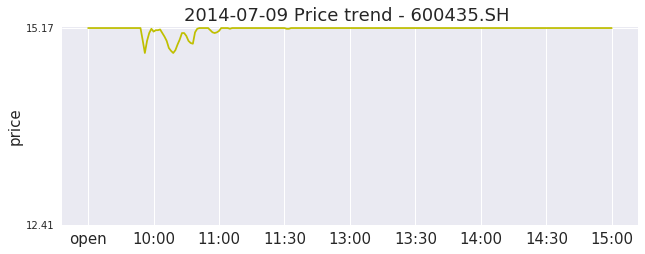

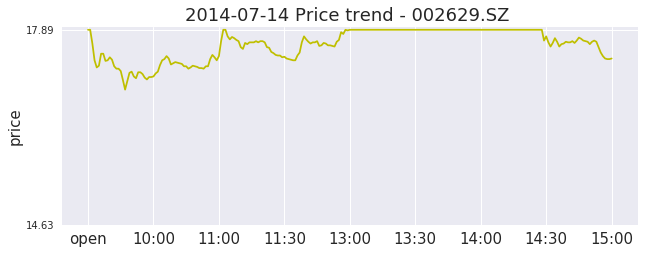

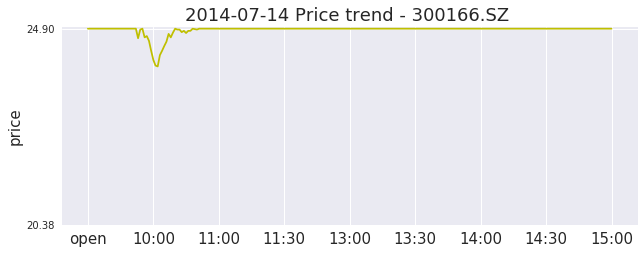

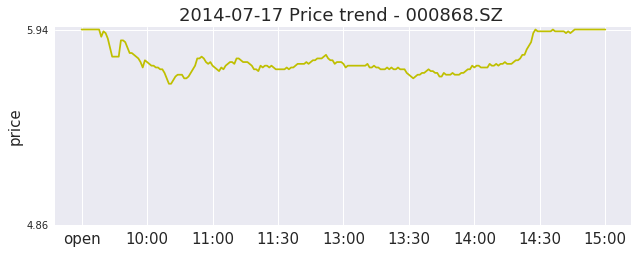

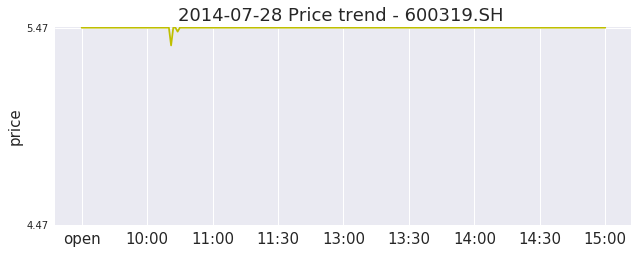

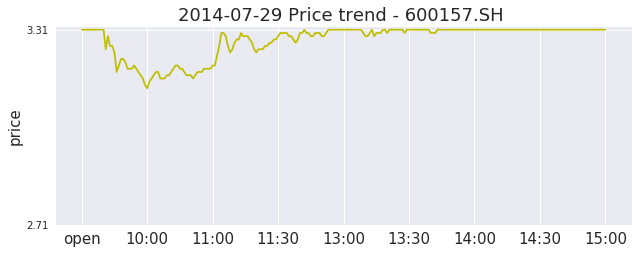

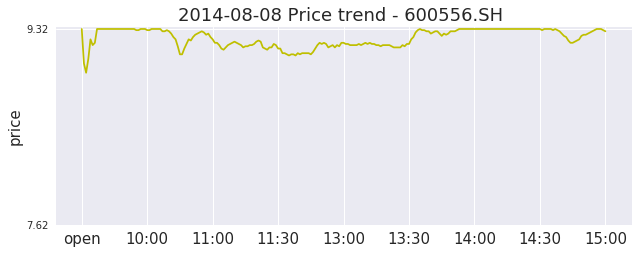

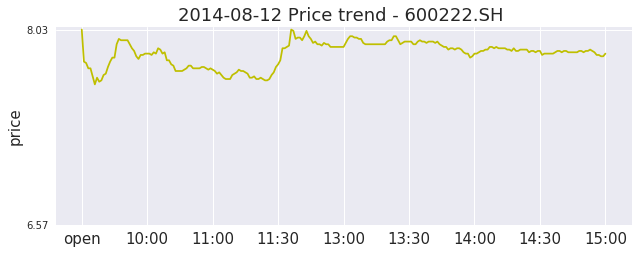

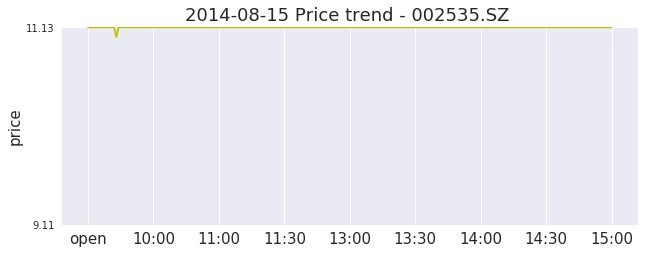

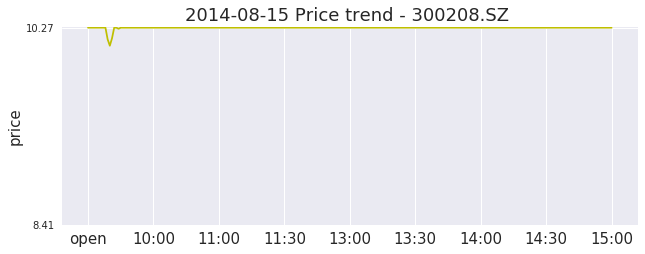

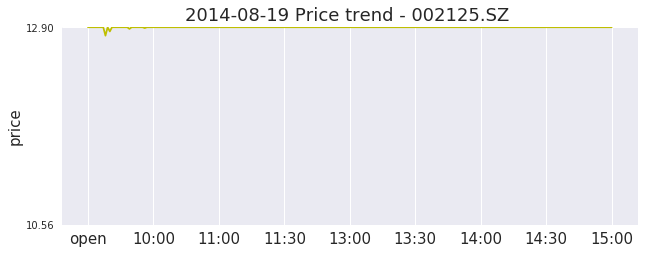

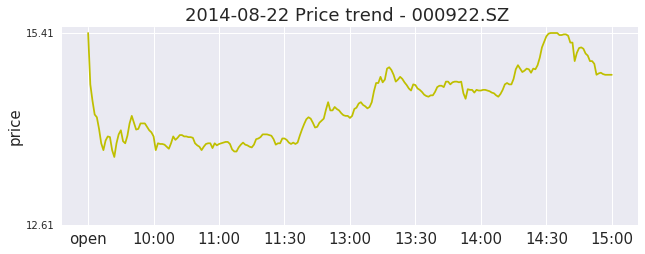

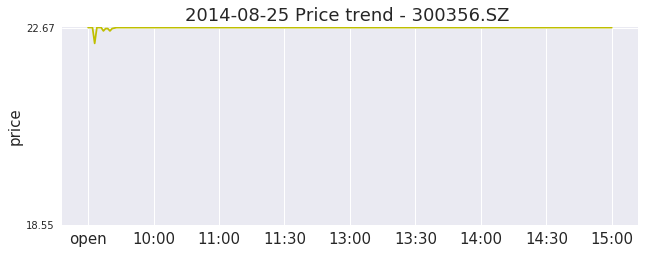

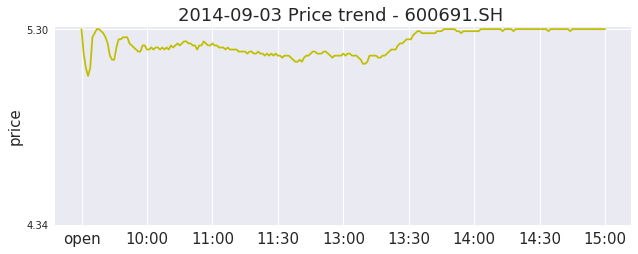

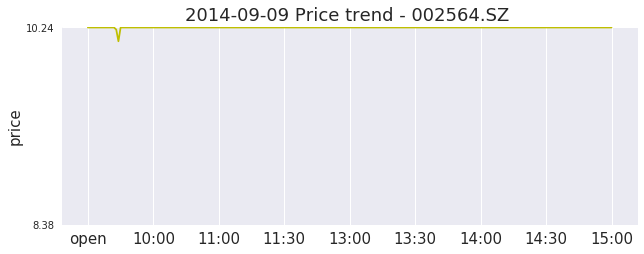

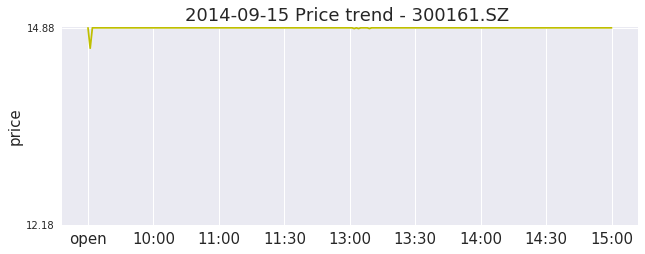

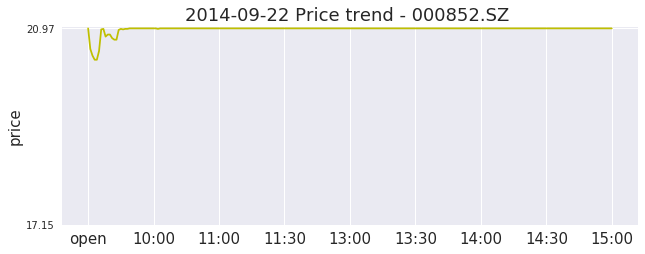

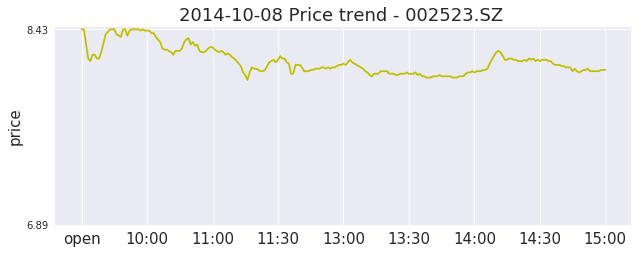

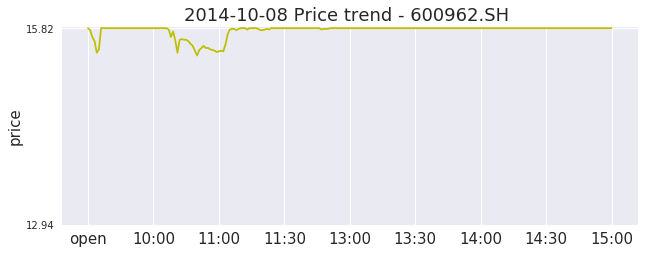

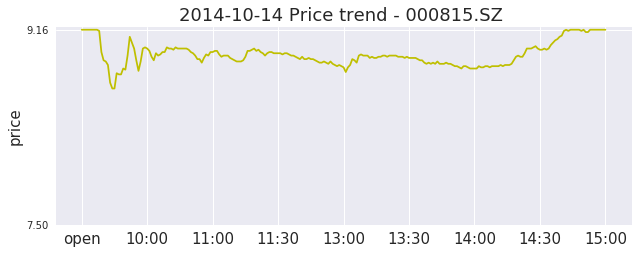

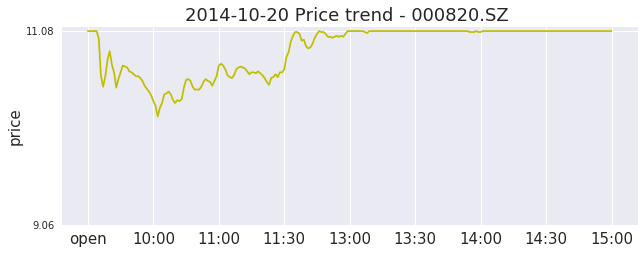

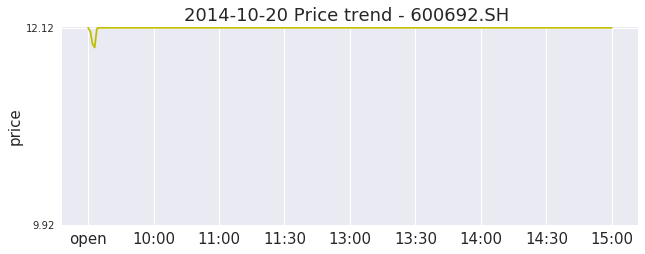

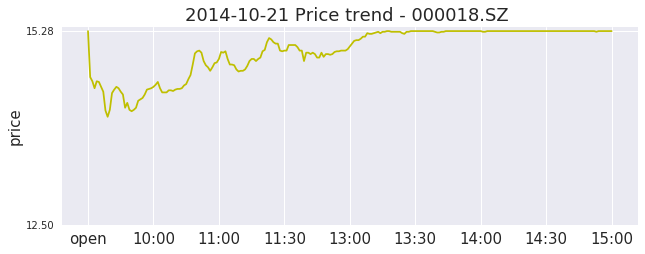

In [4]:
tradeday = list(get_trade_days(startdate, '20200202', count=None).strftime('%Y-%m-%d'))
for d in tradeday[:200]:
    if d in list(limitdt.keys()):
        if len(limitdt[d])==0:
            pass
        else:
            day = tradeday[tradeday.index(d)+1]
            stockdata = get_price(limitdt[d],None,day,'1m',['close'],True,'pre',bar_count=241,is_panel=1)
            import matplotlib.pyplot as plt
            import pandas as pd
            import numpy as np
            plt.style.use('seaborn')
            for s in list(stockdata['close'].columns):
                pc = stockdata['close'][s].iloc[0]
                highlimit = round(pc*1.1,2)
                lowlimit = round(pc*0.9,2)

                fig = plt.figure()
                axes = fig.add_axes([0.1, 0.1, 1, 0.5]) #插入面板

                x1_list=[highlimit]+list(stockdata['close'][s])[-240:]
                y=np.array(x1_list)
                x=np.array(range(0,len(x1_list)))
                axes.plot(x, y, 'y')

                axes.set_ylabel('price',fontsize=15)
                axes.set_title('{} Price trend - {} '.format(day,s),fontsize=18)
                #设置X轴
                axes.set_xticks([0,30,60,90,120,150,180,210,240])
                axes.set_xticklabels(['open','10:00','11:00','11:30','13:00','13:30','14:00','14:30','15:00'], fontsize=15)
                #设置y轴
                axes.set_yticks([lowlimit,highlimit])

In [5]:
datadf = pd.DataFrame(columns=['stock','date'])
for d in list(limitdt.keys()):
    for stock in limitdt[d]:
        datadf.loc[d]=[stock,d]

In [6]:
startdate = '20140101'
enddate = '20190227'
stock = list(get_all_securities('stock',enddate).index)
alldata = get_price(stock,startdate,enddate,'1d',['close','low','open','high'],True,'pre',is_panel=1)

closedf = alldata['close']
highdf = alldata['high']
lowdf = alldata['low']
opendf = alldata['open']

In [7]:
datadf['buyprice'] = datadf['date'].apply(lambda x:highdf.loc[x][datadf['stock'][x]])
datadf['当日收盘价'] = datadf['date'].apply(lambda x:closedf.loc[x][datadf['stock'][x]])
datadf = datadf[datadf['date']!='2019-02-25']
datadf = datadf[datadf['date']!='2019-02-26']
datadf = datadf[datadf['date']!='2019-02-27']#没有足够数据算第三天
for t in range(1,4):
    txt = str(t)+str('日收盘价')
    datadf[txt] = datadf['date'].apply(lambda x:closedf.loc[list(highdf.index)[list(highdf.index.strftime('%Y-%m-%d')).index(x)+t]][datadf['stock'][x]])/datadf['buyprice']-1
    txt = str(t)+str('日开盘价')
    datadf[txt] = datadf['date'].apply(lambda x:opendf.loc[list(highdf.index)[list(highdf.index.strftime('%Y-%m-%d')).index(x)+t]][datadf['stock'][x]])/datadf['buyprice']-1
    txt = str(t)+str('日最高价')
    datadf[txt] = datadf['date'].apply(lambda x:highdf.loc[list(highdf.index)[list(highdf.index.strftime('%Y-%m-%d')).index(x)+t]][datadf['stock'][x]])/datadf['buyprice']-1
    txt = str(t)+str('日最低价')
    datadf[txt] = datadf['date'].apply(lambda x:lowdf.loc[list(highdf.index)[list(highdf.index.strftime('%Y-%m-%d')).index(x)+t]][datadf['stock'][x]])/datadf['buyprice']-1
    
datadf


,stock,date,buyprice,当日收盘价,1日收盘价,1日开盘价,1日最高价,1日最低价,2日收盘价,2日开盘价,2日最高价,2日最低价,3日收盘价,3日开盘价,3日最高价,3日最低价
2015-11-04,000567.SZ,2015-11-04,24.04,24.04,0.099834,0.099834,0.099834,0.099834,0.165973,0.200915,0.209651,0.120216,0.282446,0.168885,0.282446,0.148087
2015-08-06,002560.SZ,2015-08-06,7.12,7.12,0.037921,0.001404,0.081461,-0.009831,0.099719,0.025281,0.136236,0.025281,0.078652,0.082865,0.102528,0.063202
2015-05-04,600744.SH,2015-05-04,9.06,9.06,0.100442,0.100442,0.100442,0.004415,0.121413,0.034216,0.203091,0.024283,0.008830,0.088300,0.113687,0.008830
2014-01-03,600010.SH,2014-01-03,1.85,1.85,-0.064865,0.027027,0.027027,-0.070270,-0.086486,-0.064865,-0.054054,-0.113514,-0.118919,-0.097297,-0.070270,-0.129730
2016-10-13,002630.SZ,2016-10-13,8.33,8.33,-0.026411,0.007203,0.033613,-0.033613,-0.042017,-0.022809,-0.001200,-0.058824,-0.006002,-0.026411,0.004802,-0.042017
2015-05-28,002163.SZ,2015-05-28,17.68,16.07,-0.059389,-0.095023,-0.027149,-0.151018,0.034502,-0.056561,0.034502,-0.066176,0.138009,0.074661,0.138009,0.046380
2015-01-30,002740.SZ,2015-01-30,13.87,13.87,-0.090123,0.006489,0.059841,-0.091565,-0.123288,-0.132660,-0.106705,-0.144196,-0.090844,-0.122567,-0.073540,-0.137707
2016-05-24,002535.SZ,2016-05-24,6.84,6.84,-0.024854,0.000000,0.035088,-0.027778,-0.033626,-0.035088,-0.023392,-0.070175,-0.023392,-0.033626,-0.008772,-0.043860
2016-10-14,000567.SZ,2016-10-14,44.99,43.35,0.002445,-0.010891,0.029562,-0.032007,0.017115,-0.013559,0.017782,-0.032007,0.017115,0.018004,0.079796,-0.007113
2018-04-16,600238.SH,2018-04-16,8.16,8.16,0.024510,0.017157,0.080882,-0.007353,-0.058824,-0.025735,-0.024510,-0.078431,-0.079657,-0.082108,-0.044118,-0.102941


In [8]:
dataclose = datadf[['1日收盘价','2日收盘价','3日收盘价']]
dataclose.describe()

,1日收盘价,2日收盘价,3日收盘价
count,493.000000,487.000000,489.000000
mean,-0.000414,-0.002019,-0.004480
std,0.072682,0.102125,0.120161
min,-0.261587,-0.226237,-0.272152
25%,-0.050445,-0.069982,-0.085106
50%,0.003135,-0.012489,-0.014986
75%,0.054232,0.062335,0.061358
max,0.109110,0.229873,0.363347


In [9]:
dataopen = datadf[['1日开盘价','2日开盘价','3日开盘价']]
dataopen.describe()

,1日开盘价,2日开盘价,3日开盘价
count,493.000000,487.000000,489.000000
mean,-0.008029,-0.010059,-0.009224
std,0.053558,0.093104,0.117593
min,-0.260801,-0.335428,-0.272152
25%,-0.039024,-0.065723,-0.086449
50%,-0.002079,-0.016000,-0.022897
75%,0.021566,0.032752,0.045455
max,0.109110,0.213752,0.332314


In [10]:
datahigh = datadf[['1日最高价','2日最高价','3日最高价']]
datahigh.describe()

,1日最高价,2日最高价,3日最高价
count,493.000000,487.000000,489.000000
mean,0.041385,0.035934,0.032868
std,0.057824,0.098000,0.124286
min,-0.231736,-0.206599,-0.272152
25%,0.003082,-0.028072,-0.053156
50%,0.050188,0.022346,0.017422
75%,0.099404,0.101514,0.097902
max,0.109110,0.229873,0.363347


In [11]:
datalow = datadf[['1日最低价','2日最低价','3日最低价']]
datalow.describe()

,1日最低价,2日最低价,3日最低价
count,493.000000,487.000000,489.000000
mean,-0.044790,-0.042641,-0.040375
std,0.055899,0.088552,0.108701
min,-0.261587,-0.335428,-0.272152
25%,-0.083601,-0.095069,-0.112610
50%,-0.040629,-0.044704,-0.050818
75%,-0.008571,0.003043,0.015770
max,0.100367,0.210480,0.331852


In [12]:
dataclosedf = datadf[['stock','date','1日收盘价','2日收盘价','3日收盘价']]
dataclosedf = dataclosedf.sort_values(by='1日收盘价',ascending=False)
# dataclosedf = dataclosedf.dropna(axis=0,how='any')
dataclosedf

,stock,date,1日收盘价,2日收盘价,3日收盘价
2015-05-19,002014.SZ,2015-05-19,0.109110,0.229873,0.363347
2014-07-08,600435.SH,2014-07-08,0.103079,0.168675,0.267738
2015-01-12,002738.SZ,2015-01-12,0.102527,0.215162,0.338628
2015-05-20,000838.SZ,2015-05-20,0.101644,0.038864,0.143498
2015-06-04,300309.SZ,2015-06-04,0.101124,-0.008427,0.056180
2015-07-30,300368.SZ,2015-07-30,0.100917,0.211009,0.332314
2018-08-08,600470.SH,2018-08-08,0.100858,-0.006438,-0.062232
2014-07-28,600157.SH,2014-07-28,0.100806,0.213710,0.266129
2015-04-02,002006.SZ,2015-04-02,0.100775,0.136090,0.090439
2014-08-22,300356.SZ,2014-08-22,0.100775,0.075305,0.160576


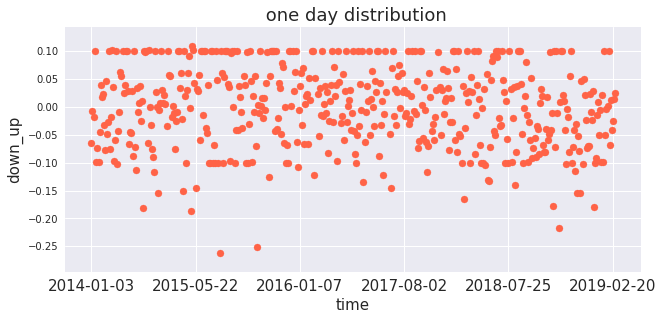

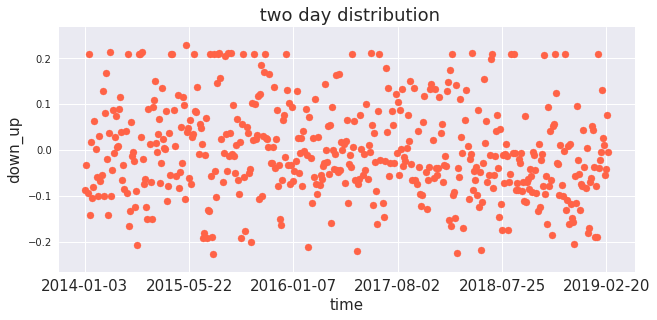

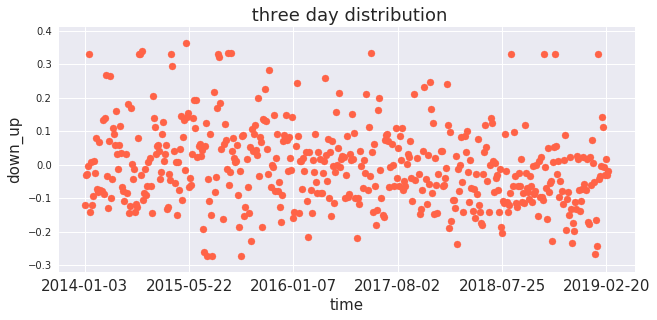

In [13]:
dt = dataclosedf
dt = dt.sort_values(by='date')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


plt.style.use('seaborn')
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 0.618]) #插入面板

x1_list=list(dt['1日收盘价'])
y=np.array(x1_list)
x=np.array(range(0,len(x1_list)))
axes.scatter(x,y,c='tomato')
axes.set_xlabel('time',fontsize=15)
axes.set_ylabel('down_up',fontsize=15)
axes.set_title(' one day distribution',fontsize=18)
# #设置X轴
axes.set_xticks([0,100,200,300,400,500])
axes.set_xticklabels([list(dt.index)[0],list(dt.index)[100],list(dt.index)[200],list(dt.index)[300],list(dt.index)[400],list(dt.index)[500]],fontsize=15)

plt.style.use('seaborn')
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 0.618]) #插入面板

x1_list=list(dt['2日收盘价'])
y=np.array(x1_list)
x=np.array(range(0,len(x1_list)))
axes.scatter(x,y,c='tomato')
axes.set_xlabel('time',fontsize=15)
axes.set_ylabel('down_up',fontsize=15)
axes.set_title(' two day distribution',fontsize=18)
# #设置X轴
axes.set_xticks([0,100,200,300,400,500])
axes.set_xticklabels([list(dt.index)[0],list(dt.index)[100],list(dt.index)[200],list(dt.index)[300],list(dt.index)[400],list(dt.index)[500]],fontsize=15)

plt.style.use('seaborn')
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 0.618]) #插入面板

x1_list=list(dt['3日收盘价'])
y=np.array(x1_list)
x=np.array(range(0,len(x1_list)))
axes.scatter(x,y,c='tomato')
axes.set_xlabel('time',fontsize=15)
axes.set_ylabel('down_up',fontsize=15)
axes.set_title(' three day distribution',fontsize=18)
# #设置X轴
axes.set_xticks([0,100,200,300,400,500])
axes.set_xticklabels([list(dt.index)[0],list(dt.index)[100],list(dt.index)[200],list(dt.index)[300],list(dt.index)[400],list(dt.index)[500]],fontsize=15)


In [14]:
labeldt = dataclosedf
labeldt['1日收盘价'] = labeldt['1日收盘价'].apply(lambda x:1 if x>0 else -1)
labeldt['2日收盘价'] = labeldt['2日收盘价'].apply(lambda x:1 if x>0 else -1)
labeldt['3日收盘价'] = labeldt['3日收盘价'].apply(lambda x:1 if x>0 else -1)
labeldt = labeldt.sort_values(by='date')
labeldt

,stock,date,1日收盘价,2日收盘价,3日收盘价
2014-01-03,600010.SH,2014-01-03,-1,-1,-1
2014-01-16,000767.SZ,2014-01-16,-1,-1,-1
2014-02-12,000971.SZ,2014-02-12,-1,-1,-1
2014-02-21,000554.SZ,2014-02-21,-1,-1,-1
2014-02-28,600680.SH,2014-02-28,1,1,1
2014-03-10,300116.SZ,2014-03-10,-1,-1,-1
2014-03-13,000923.SZ,2014-03-13,-1,1,1
2014-03-27,000687.SZ,2014-03-27,-1,-1,-1
2014-04-03,000918.SZ,2014-04-03,-1,-1,-1
2014-04-10,300278.SZ,2014-04-10,1,1,1


In [15]:
tradeday = list(get_trade_days(startdate, '20200202', count=None).strftime('%Y-%m-%d'))

timelist = []
trlist= []
lplist =[]
q_trlist = []
for d in tradeday:
    time = 0
    tr = 0
    lp = 0
    q_tr = 0
    if d in list(labeldt['date']):
        stock = labeldt['stock'][d]
        day = tradeday[tradeday.index(d)+1]
        stockdata = get_price(stock,None,day,'1m',['close','high','low','open','turnover_rate'],True,'pre',bar_count=241,is_panel=0)
        
        pc = stockdata.iloc[0].close
        highlimit = round(pc*1.1,2)
        
        stockdata = stockdata.iloc[-240:]
        
        for m in list(range(0,240)):
            
            rc = stockdata.iloc[m].close
            h = stockdata.iloc[(m+1)].high
            
            if rc == highlimit:
                q_tr +=stockdata.iloc[m].turnover_rate
                
            if rc<highlimit:
                time += 1
                tr +=stockdata.iloc[m].turnover_rate
                lp = min(stockdata.iloc[m].low/highlimit-1,lp)
            
            if rc<highlimit and h == highlimit:
                break
        if time>0:
            timelist.append(time)
            trlist.append(round(tr,2))
            lplist.append(round(lp*100,2))
            q_trlist.append(round(q_tr,2))
timelist

[111,
 2,
 209,
 1,
 1,
 1,
 1,
 25,
 1,
 2,
 1,
 2,
 1,
 1,
 3,
 1,
 5,
 228,
 19,
 11,
 4,
 60,
 1,
 1,
 1,
 6,
 95,
 3,
 1,
 211,
 1,
 6,
 2,
 1,
 6,
 5,
 1,
 91,
 135,
 2,
 1,
 1,
 236,
 149,
 52,
 6,
 3,
 2,
 2,
 1,
 6,
 1,
 1,
 1,
 4,
 38,
 1,
 6,
 1,
 14,
 180,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 172,
 1,
 142,
 43,
 26,
 1,
 1,
 4,
 1,
 5,
 30,
 3,
 5,
 5,
 5,
 4,
 2,
 5,
 5,
 20,
 1,
 102,
 6,
 166,
 1,
 1,
 24,
 1,
 1,
 136,
 26,
 3,
 2,
 4,
 1,
 3,
 1,
 2,
 25,
 5,
 2,
 83,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 8,
 4,
 19,
 2,
 1,
 7,
 3,
 25,
 1,
 2,
 76,
 8,
 2,
 28,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 24,
 2,
 1,
 1,
 1,
 3,
 4,
 60,
 2,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 228,
 5,
 27,
 179,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 82,
 1,
 1,
 1,
 2,
 5,
 2,
 1,
 148,
 4,
 1,
 1,
 1,
 1,
 2,
 29,
 2,
 9,
 3,
 1,
 2,
 3,
 11,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 171,
 1,
 157,
 1,
 2,
 4,
 3,
 1,
 2,
 2,
 120,
 1,
 30,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 106,


In [16]:
labeldt['time'] = timelist
labeldt['Change'] = trlist
labeldt['drop range'] = lplist
labeldt['limit Change'] = q_trlist
labeldt

,stock,date,1日收盘价,2日收盘价,3日收盘价,time,Change,drop range,limit Change
2014-01-03,600010.SH,2014-01-03,-1,-1,-1,111,4.66,-3.65,0.00
2014-01-16,000767.SZ,2014-01-16,-1,-1,-1,2,0.23,-2.27,0.00
2014-02-12,000971.SZ,2014-02-12,-1,-1,-1,209,10.74,-7.14,0.00
2014-02-21,000554.SZ,2014-02-21,-1,-1,-1,1,3.99,-1.19,9.58
2014-02-28,600680.SH,2014-02-28,1,1,1,1,0.79,-0.60,1.95
2014-03-10,300116.SZ,2014-03-10,-1,-1,-1,1,1.16,-1.14,15.01
2014-03-13,000923.SZ,2014-03-13,-1,1,1,1,1.42,-1.99,2.48
2014-03-27,000687.SZ,2014-03-27,-1,-1,-1,25,8.88,-7.78,1.11
2014-04-03,000918.SZ,2014-04-03,-1,-1,-1,1,0.68,-4.82,0.43
2014-04-10,300278.SZ,2014-04-10,1,1,1,2,4.56,-2.59,3.06


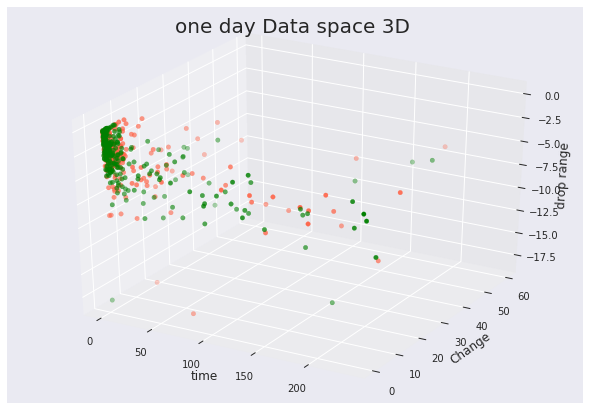

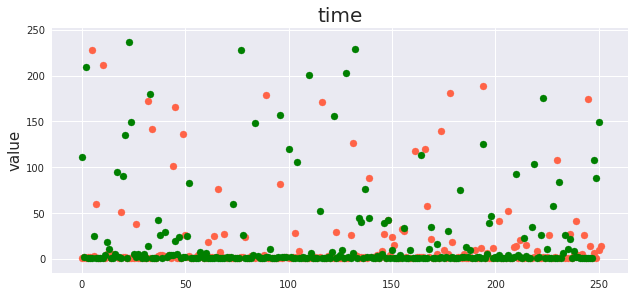

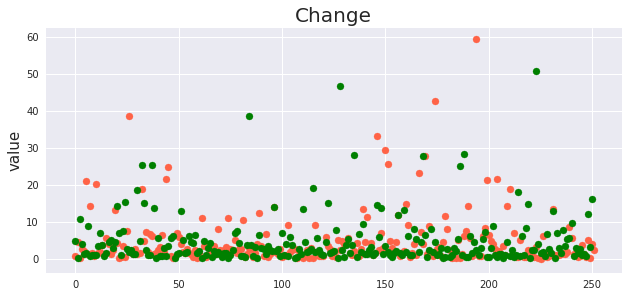

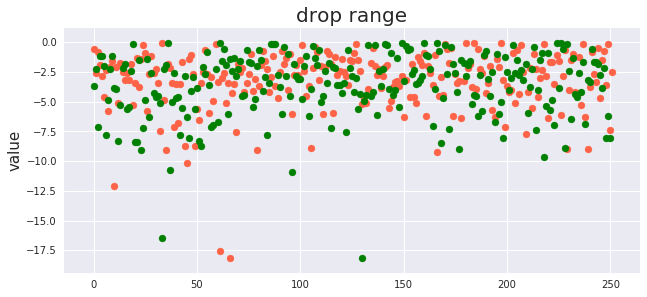

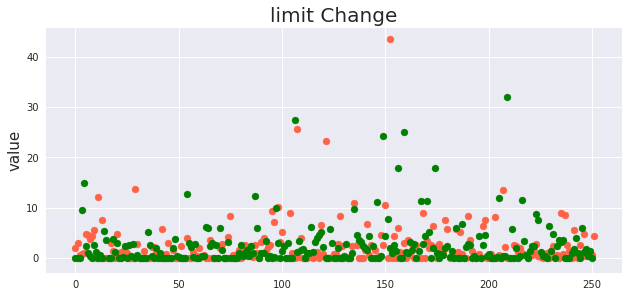

In [17]:
updt = labeldt[labeldt['1日收盘价']==1]
downdt =  labeldt[labeldt['1日收盘价']==-1]
label = ['time','Change','drop range','limit Change']
from mpl_toolkits.mplot3d import Axes3D
xsup1 = updt[label[0]]
xsup2 = updt[label[1]]
xsup3 = updt[label[2]]
xsdown1 = downdt[label[0]]
xsdown2 = downdt[label[1]]
xsdown3 = downdt[label[2]]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xsup1,xsup2,xsup3,c='tomato')
ax.scatter(xsdown1,xsdown2,xsdown3,c='g')
ax.set_xlabel(label[0],fontsize=12)
ax.set_ylabel(label[1],fontsize=12)
ax.set_zlabel(label[2],fontsize=12)
ax.set_title('one day Data space 3D ',fontsize=20)
plt.show()

for l in label:
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 1, 0.618]) 
    x1_list=list(updt[l])
    y=np.array(x1_list)
    x=np.array(range(0,len(x1_list)))
    axes.scatter(x,y,c='tomato')

    x1_list=list(downdt[l])
    y=np.array(x1_list)
    x=np.array(range(0,len(x1_list)))
    axes.scatter(x,y,c='g')
    axes.set_ylabel('value',fontsize=15)
    axes.set_title(l,fontsize=20)

In [55]:
labeldt
label = ['time','Change','drop range','limit Change']

train = labeldt[:300]
test = labeldt[-200:]
X=train[label]
Y=train['1日收盘价']
X_test=test[label]
Y_test=test['1日收盘价']

from sklearn import svm
model = svm.SVC(C=1, kernel='rbf', gamma=0.5, decision_function_shape='ovo')

model.fit(X, Y)
print('训练时,预测成功率 {}'.format(round(np.mean(model.predict(X)==Y),2)))
print('测试时,预测成功率 {}'.format(round(np.mean(model.predict(X_test)==Y_test),2)))

训练时,预测成功率 0.88
测试时,预测成功率 0.55


In [102]:
dataclosedf = datadf#[['stock','date','1日收盘价','2日收盘价','3日收盘价']]
dataclosedf = dataclosedf.sort_values(by='1日收盘价',ascending=False)


tradeday = list(get_trade_days(startdate, '20200202', count=None).strftime('%Y-%m-%d'))

timelist = []
trlist= []
lplist =[]
q_trlist = []
for d in tradeday:
    time = 0
    tr = 0
    lp = 0
    q_tr = 0
    if d in list(labeldt['date']):
        stock = labeldt['stock'][d]
        day = tradeday[tradeday.index(d)+1]
        stockdata = get_price(stock,None,day,'1m',['close','high','low','open','turnover_rate'],True,'pre',bar_count=241,is_panel=0)
        
        pc = stockdata.iloc[0].close
        highlimit = round(pc*1.1,2)
        
        stockdata = stockdata.iloc[-240:]
        
        for m in list(range(0,240)):
            
            rc = stockdata.iloc[m].close
            h = stockdata.iloc[(m+1)].high
            
            if rc == highlimit:
                q_tr +=stockdata.iloc[m].turnover_rate
                
            if rc<highlimit:
                time += 1
                tr +=stockdata.iloc[m].turnover_rate
                lp = min(stockdata.iloc[m].low/highlimit-1,lp)
            
            if rc<highlimit and h == highlimit:
                break
        if time>0:
            timelist.append(time)
            trlist.append(round(tr,2))
            lplist.append(round(lp*100,2))
            q_trlist.append(round(q_tr,2))
dataclosedf['time'] = timelist
dataclosedf['Change'] = trlist
dataclosedf['drop range'] = lplist
dataclosedf['limit Change'] = q_trlist
dataclosedf

,stock,date,buyprice,当日收盘价,1日收盘价,1日开盘价,1日最高价,1日最低价,2日收盘价,2日开盘价,2日最高价,2日最低价,3日收盘价,3日开盘价,3日最高价,3日最低价,time,Change,drop range,limit Change
2015-05-19,002014.SZ,2015-05-19,9.44,9.44,0.109110,0.109110,0.109110,0.061441,0.229873,0.119703,0.229873,0.112288,0.363347,0.324153,0.363347,0.318856,111,4.66,-3.65,0.00
2014-07-08,600435.SH,2014-07-08,7.47,7.47,0.103079,0.038822,0.103079,0.024096,0.168675,0.156627,0.214190,0.140562,0.267738,0.164659,0.282463,0.143240,2,0.23,-2.27,0.00
2015-01-12,002738.SZ,2015-01-12,13.85,13.85,0.102527,0.010108,0.102527,-0.031047,0.215162,0.156679,0.215162,0.133574,0.338628,0.257762,0.338628,0.246209,209,10.74,-7.14,0.00
2015-05-20,000838.SZ,2015-05-20,6.69,6.69,0.101644,0.013453,0.101644,0.001495,0.038864,0.213752,0.213752,0.038864,0.143498,0.005979,0.143498,-0.008969,1,3.99,-1.19,9.58
2015-06-04,300309.SZ,2015-06-04,10.68,10.68,0.101124,0.088015,0.101124,0.061798,-0.008427,0.113296,0.113296,-0.010300,0.056180,-0.028090,0.056180,-0.029026,1,0.79,-0.60,1.95
2015-07-30,300368.SZ,2015-07-30,9.81,9.81,0.100917,-0.002039,0.100917,-0.040775,0.211009,0.113150,0.211009,0.076453,0.332314,0.332314,0.332314,0.298675,1,1.16,-1.14,15.01
2018-08-08,600470.SH,2018-08-08,4.66,4.66,0.100858,-0.034335,0.100858,-0.036481,-0.006438,0.072961,0.094421,-0.008584,-0.062232,-0.051502,-0.040773,-0.081545,1,1.42,-1.99,2.48
2014-07-28,600157.SH,2014-07-28,2.48,2.48,0.100806,-0.004032,0.100806,-0.012097,0.213710,0.153226,0.213710,0.137097,0.266129,0.262097,0.338710,0.241935,25,8.88,-7.78,1.11
2015-04-02,002006.SZ,2015-04-02,11.61,11.61,0.100775,0.088717,0.100775,0.063738,0.136090,0.193798,0.193798,0.074074,0.090439,0.114556,0.114556,0.055986,1,0.68,-4.82,0.43
2014-08-22,300356.SZ,2014-08-22,9.03,9.03,0.100775,0.014396,0.100775,0.014396,0.075305,0.071982,0.087486,0.047619,0.160576,0.107420,0.182724,0.091916,2,4.56,-2.59,3.06


In [184]:
xdf = dataclosedf.dropna(axis=0)

In [185]:
xdf = xdf.sort_values(by='date')
xlabel = ['time','Change','drop range','limit Change']
ylabel = '3日收盘价'
xdf[ylabel] =xdf[ylabel].apply(lambda x:1 if x>0.02 else -1)

train = xdf[:300]
test = xdf[-200:]

X=train[xlabel]
Y=train[ylabel]

X_test=test[xlabel]
Y_test=test[ylabel]

from sklearn import svm
model = svm.SVC(C=5, kernel='rbf', gamma=0.5)

model.fit(X, Y)
print('训练时,预测成功率 {}'.format(round(np.mean(model.predict(X)==Y),2)))
print('测试时,预测成功率 {}'.format(round(np.mean(model.predict(X_test)==Y_test),2)))
len(list(test[test[ylabel]==1].index)),len(list(test[test[ylabel]==-1].index))

训练时,预测成功率 0.92
测试时,预测成功率 0.6


(49, 151)